# Testing de GUI
Crear un venv para entorno de testing, fijaremos las dependencias en un requirements.txt cuando codifiquemos bien. 
Si falta paquete instalar con pip y **reiniciar el kernel**

Los imports estan en orden de ejecucion, si se ejecutan las celdas fuera de orden hay que importar a mano lo que falte.
No llamar a QApplication mas de una vez, usar app, o sino peta el kernel

In [1]:
from PyQt5.QtWidgets import QApplication, QWidget

# Primero hay que crear el objeto aplicación, le pasamos una lista vacia porque requiere una lista de argumentos, que en nuestro caso es ninguno
app = QApplication([])

# Creamos un Widget, que por defecto viene invisible
window = QWidget()
window.show()

# Esto ejecuta un bucle infinito hasta que el usuario cierra la app
app.exec()

0

También podemos crear botones:

In [2]:
from PyQt5.QtWidgets import QPushButton

# A QWidget le metemos un QPushButton, parece que meter objetos dentro de objetos es como funciona pyQT
window = QPushButton("Click Aqui")
window.show()

app.exec()

0

Hay una clase llamada MainWindow que parece tener funciones adicionales internas, se invoca igual que una normal:

In [3]:
from PyQt5.QtWidgets import QMainWindow

window = QMainWindow()
window.show()

app.exec()

0

Para customizar la ventana hay que crear una clase hijo de QMainWindow y dentro podemos tocar cosas:

In [4]:
# Mi clase VentanaPrincipal va a ser hija de QMainWindow y le voy a poner un titulo y un botón
class VentanaPrincipal(QMainWindow):

    def __init__(self):

        # Inicializala como si fuera un QMainWindow (super es el padre)
        super().__init__()

        # Podemos cambiar el titulo con setWindowTitle
        self.setWindowTitle("WebScrapingDALP")
        button = QPushButton("Click Aqui!")

        # Esto permite alinear el widget al centro
        self.setCentralWidget(button)

# Invocamos a la clase
window = VentanaPrincipal()
window.show()

app.exec()

0

El botón cubre toda la ventana y se mueve dinamicamente si le cambiamos el tamaño, y la app se llama diferente, perfecto.

Vamos a meter algo de texto en vez del botón:

In [5]:
from PyQt5.QtWidgets import QLabel
from PyQt5.QtCore import Qt

class VentanaPrincipal(QMainWindow):

    def __init__(self):

        super().__init__()

        self.setWindowTitle("WebScrapingDALP")
        label = QLabel("Hello World")

        # Podemos alinear el texto al centro, pero tenemos que usar la utilidad de QtCore
        label.setAlignment(Qt.AlignCenter)

        self.setCentralWidget(label)



window = VentanaPrincipal()
window.show()

app.exec()

0

Y si quiero las dos? Al parecer el widget principal por si solo solo permite un widget dentro, pero existe otro widget (me voy a cansar de decir widget) que se llama layout que es una plantilla que permite dividir, posicionar y sobre todo tener multiples subventanas.

Vamos a ver como se puede implementar:

In [6]:
from PyQt5.QtWidgets import QVBoxLayout

class VentanaPrincipal(QMainWindow):
    def __init__(self):
        super().__init__()

        self.setWindowTitle("WebScrapingDALP")

        # Creamos un widget central y la platilla layout
        central = QWidget()
        layout = QVBoxLayout()

        # Label arriba
        label = QLabel("Hello World")
        label.setAlignment(Qt.AlignCenter)  # centrar el texto
        # Se añaden uno debajo del otro en orden porque QV es vertical, existe QHBoxLayout que es horizontal
        layout.addWidget(label) 

        # Botón debajo
        button = QPushButton("Click Aqui!")
        layout.addWidget(button)

        # Aplicamos la plantilla del layout al widget central y lo centramos
        central.setLayout(layout)
        self.setCentralWidget(central)


window = VentanaPrincipal()
window.show()

app.exec()

0

Vamos a mirar más elementos, para el scraper seguramente nos venga bien una lista para seleccionar elementos.

Hay varios tipos de listas, vamos a mirar que nos viene bien:

In [ ]:
from PyQt5.QtWidgets import QListWidget

# Creamos el widget de lista
lista = QListWidget()

# Le añadimos los objetos con una lista nuestra de python
lista.addItems(["Producto 1", "Producto 2", "Producto 3"])

# Mostrar porque por defecto son ocultos
lista.show()

app.exec()

0

In [ ]:
from PyQt5.QtWidgets import QComboBox

# Creamos el widget de combobox y lo mismo que la lista
combobox = QComboBox()

combobox.addItems(["Producto 1", "Producto 2", "Producto 3"])
combobox.show()

app.exec()

0

La combobox me gusta más, si tenemos 20 artículos no poder plegar el selector va a ser un problema.

En webs es común poder editar la combobox y que mientras escribas te vaya filtrando opciones. He encontrado una adaptación en StackOverflow que hace exactamente eso:

In [9]:
from PyQt5.QtWidgets import QCompleter
from itertools import product # Este es solo para generar la lista de palabras, viene con python

# Crea la lista interpolando abc y sale [aaaa,aaab,aaac,aaba,...]
wordlist = [''.join(combo) for combo in product('abc', repeat = 4)]

# Crea y agrega la lista a un combobox
combo = QComboBox()
combo.addItems(wordlist)

# Permite editar el campo de la combobox y el NoInsert hace que no se autorellene
# de golpe la primera opcion que pille para poder seguir escribiendo
combo.setEditable(True)
combo.setInsertPolicy(QComboBox.NoInsert)

# Hay un atributo de como completar la combobox, con PopupCompletion va marcando las sugerencias debajo
combo.completer().setCompletionMode(QCompleter.PopupCompletion)

combo.show()
app.exec()

0

Perfecto, vamos a hacer un mockup de la app, añadiendo la combobox a la derecha del label.

Para esto hay que anidar layouts verticales y horizontales:

In [12]:
from PyQt5.QtWidgets import QHBoxLayout

class VentanaPrincipal(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("WebScrapingDALP")

        central = QWidget()
        main_layout = QVBoxLayout()  # layout vertical general

        # Fila con label y combobox
        fila = QHBoxLayout()
        label = QLabel("Seleccione producto:")
        combo = QComboBox()
        combo.addItems(["RTX 3060", "Radeon 6900", "RTX 3080"])
        combo.setEditable(True)
        combo.setInsertPolicy(QComboBox.NoInsert)
        combo.completer().setCompletionMode(QCompleter.PopupCompletion)

        fila.addWidget(label)
        fila.addWidget(combo)
        main_layout.addLayout(fila)  # agregamos la fila al layout vertical

        # Botón abajo
        boton = QPushButton("Buscar")
        main_layout.addWidget(boton)

        central.setLayout(main_layout)
        self.setCentralWidget(central)

ventana = VentanaPrincipal()
ventana.show()
app.exec()

0

Solo para tres widgets ya hay bastante lio, esto sería la representación visual de lo que tenemos hasta ahora:
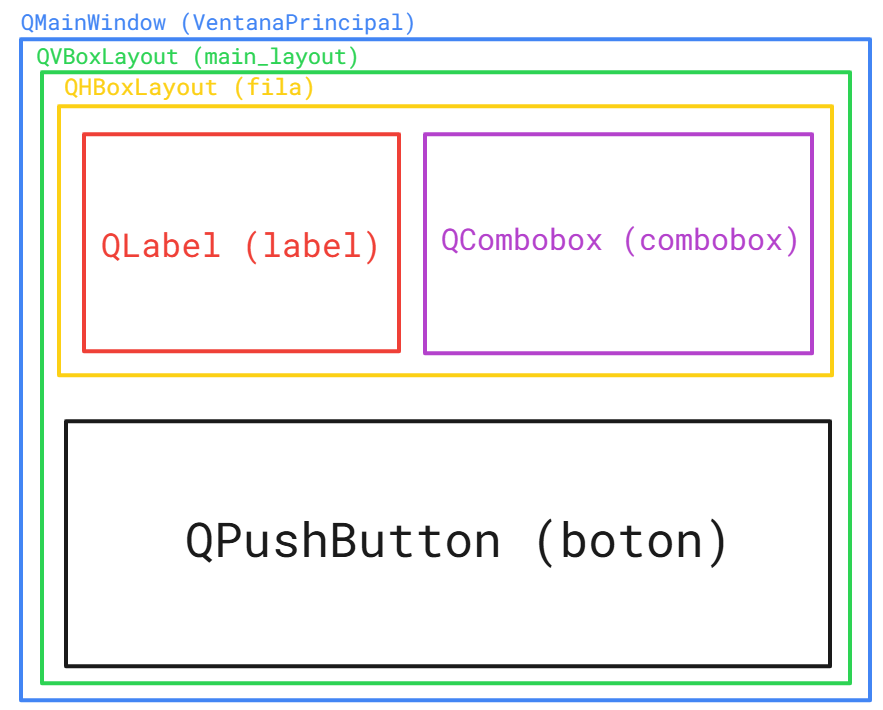

Vamos a intentar atar una acción al botón:

In [ ]:
from PyQt5.QtWidgets import QMessageBox

class VentanaPrincipal(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("WebScrapingDALP")

        central = QWidget()
        main_layout = QVBoxLayout()

        fila = QHBoxLayout()
        label = QLabel("Seleccione producto:")
        combo = QComboBox()
        combo.addItems(["RTX 3060", "Radeon 6900", "RTX 3080"])
        combo.setEditable(True)
        combo.setInsertPolicy(QComboBox.NoInsert)
        combo.completer().setCompletionMode(QCompleter.PopupCompletion)

        fila.addWidget(label)
        fila.addWidget(combo)
        main_layout.addLayout(fila)

        boton = QPushButton("Buscar")
        # Le añadimos el evento "cuando se hace click conecta esto ->" y le creamos la funcion más abajo
        # Honestamente no se porque hay que pasarla como una funcion lambda, si no se ejecuta al instante y todo peta
        boton.clicked.connect(lambda: self.mostrar_popup(combo))
        main_layout.addWidget(boton)

        central.setLayout(main_layout)
        self.setCentralWidget(central)
    
    def mostrar_popup(self, combo):
        producto = combo.currentText()  # lee lo seleccionado en el combobox
        msg = QMessageBox()
        msg.setWindowTitle("Producto Seleccionado")
        msg.setText(f"Producto: {producto}")
        msg.exec()

ventana = VentanaPrincipal()
ventana.show()
app.exec()

0

Perfecto, ahora la idea es meter el gráfico de MatplotLib dentro de ese mensaje, por ejemplo.

Matplotlib y pyQt5 tienen un backend comun para ello:

0

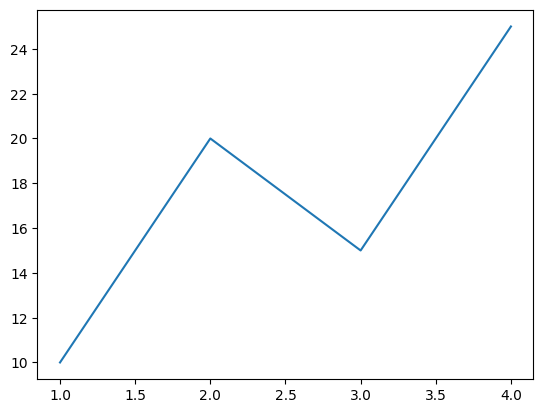

In [ ]:
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
import matplotlib.pyplot as plt

class VentanaGrafico(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("Gráfico en PyQt")

        central = QWidget()
        layout = QVBoxLayout()

        # Crear figura y canvas de pyplot
        fig, ax = plt.subplots()
        ax.plot([1,2,3,4], [10,20,15,25])  # ejemplo de datos
        canvas = FigureCanvas(fig)

        layout.addWidget(canvas)
        central.setLayout(layout)
        self.setCentralWidget(central)

ventana = VentanaGrafico()
ventana.show()
app.exec()

Parece que también devuelve el gráfico por consola tras la ejecución pero eso es un error para el futuro :)

Ahora sabemos que podemos meter el FigureCanvas como widget central en el dialogo de msg